In [1]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
import pydot

In [2]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Load dataset
#names = ['id','age','sex','region','income','married','children','car','saving_acc','current_acc','mortgage','loan']
dataset = pandas.read_csv('./bank_data.csv')

In [4]:
# shape - show dataset range 
print(dataset.shape)

(599, 12)


In [5]:
# head - print data headers
print(dataset.head(5))

        id  age     sex      region   income married  children  car  \
0  ID12102   40    MALE        TOWN  30085.1     YES         3  YES   
1  ID12103   51  FEMALE  INNER_CITY  16575.4     YES         0  YES   
2  ID12104   23  FEMALE        TOWN  20375.4     YES         3   NO   
3  ID12105   57  FEMALE       RURAL  50576.3     YES         0   NO   
4  ID12106   57  FEMALE        TOWN  37869.6     YES         2   NO   

  saving_acc current_acc mortgage loan  
0         NO         YES      YES   NO  
1        YES         YES       NO   NO  
2         NO         YES       NO   NO  
3        YES          NO       NO   NO  
4        YES         YES       NO  YES  


In [6]:
# descriptions - describe data - general stats
print(dataset.describe())

              age        income    children
count  599.000000    599.000000  599.000000
mean    42.385643  27540.689032    1.011686
std     14.435181  12903.788885    1.057635
min     18.000000   5014.210000    0.000000
25%     30.000000  17258.900000    0.000000
50%     42.000000  24946.600000    1.000000
75%     55.500000  36179.150000    2.000000
max     67.000000  63130.100000    3.000000


In [7]:
#identify columns with null values & number of rows with nulls for that column
dataset.apply(lambda x: sum(x.isnull()),axis=0)

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
saving_acc     0
current_acc    0
mortgage       0
loan           0
dtype: int64

In [8]:
# identify datatypes for each column
print(dataset.dtypes)

id              object
age              int64
sex             object
region          object
income         float64
married         object
children         int64
car             object
saving_acc      object
current_acc     object
mortgage        object
loan            object
dtype: object


In [9]:
# create a copy
import copy
ds_orig = copy.deepcopy(dataset)

In [10]:
#get object type column names
obj_cols = list(dataset.select_dtypes(include=['object']).columns.values)
print(obj_cols)

['id', 'sex', 'region', 'married', 'car', 'saving_acc', 'current_acc', 'mortgage', 'loan']


In [11]:
# Encoding object type to numberic type
le = LabelEncoder()
for i in obj_cols:
    dataset[i] = le.fit_transform(dataset[i])

In [12]:
print(dataset.dtypes)

id               int64
age              int64
sex              int64
region           int64
income         float64
married          int64
children         int64
car              int64
saving_acc       int64
current_acc      int64
mortgage         int64
loan             int64
dtype: object


In [13]:
# head
print(dataset.head(5))

   id  age  sex  region   income  married  children  car  saving_acc  \
0   0   40    1       3  30085.1        1         3    1           0   
1   1   51    0       0  16575.4        1         0    1           1   
2   2   23    0       3  20375.4        1         3    0           0   
3   3   57    0       1  50576.3        1         0    0           1   
4   4   57    0       3  37869.6        1         2    0           1   

   current_acc  mortgage  loan  
0            1         1     0  
1            1         0     0  
2            1         0     0  
3            0         0     0  
4            1         0     1  


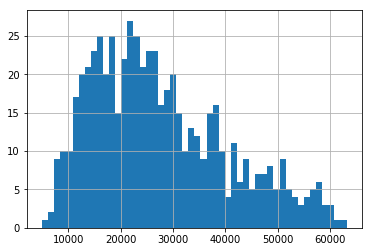

In [14]:
dataset['income'].hist(bins=50)

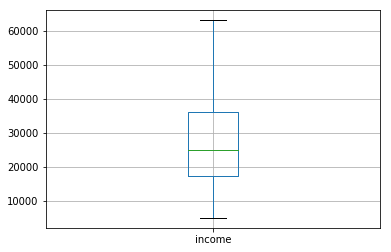

In [15]:
dataset.boxplot(column='income')

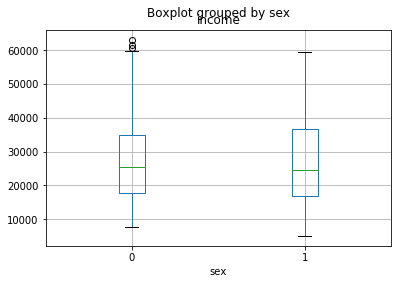

In [16]:
dataset.boxplot(column='income', by = 'sex')

In [17]:
%%capture
# gather features
Y = dataset['loan']
dataset = dataset.drop(['loan'], axis = 1)
features = "+".join(dataset.columns)

dataset['loan'] = Y

# get y and X dataframes based on this regression:
y, X = dmatrices('loan ~' + features, dataset, return_type='dataframe')

In [18]:
#correlation of features with dependent field
dataset['loan'] = le.fit_transform(dataset['loan'])
corr_matrix = dataset.corr()
corr_matrix['loan'].sort_values(ascending=False)

loan           1.000000
income         0.223735
age            0.173311
sex            0.048753
id             0.029330
current_acc    0.028470
car            0.020752
mortgage      -0.022883
region        -0.025578
children      -0.057700
saving_acc    -0.070263
married       -0.187531
Name: loan, dtype: float64

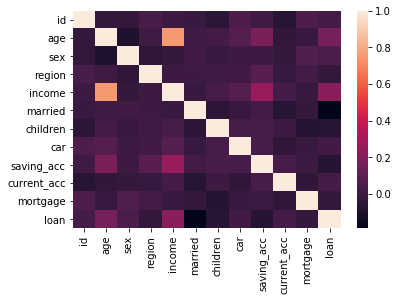

In [19]:
# Create Heatmap
sns.heatmap(corr_matrix)

In [20]:
# trying to identify few relations in data
temp = ds_orig.groupby(['married', 'sex', 'loan'])['married'].count().unstack('loan')
print(temp)

loan             NO  YES
married sex             
NO      FEMALE   43   61
        MALE     41   58
YES     FEMALE  127   68
        MALE    115   86


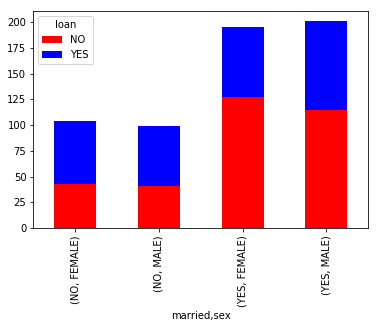

In [21]:
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [22]:
temp1 = ds_orig['married'].value_counts(ascending=True)
temp2 = ds_orig.pivot_table(values='loan',
index=['married'],aggfunc=
                       lambda x: x.map({'YES':1,'NO':0}).mean())
print('Frequency Table for Married:') 
print(temp1)

print('\nProbility of getting loan for each Married class:')
print(temp2)

Frequency Table for Married:
NO     203
YES    396
Name: married, dtype: int64

Probility of getting loan for each Married class:
             loan
married          
NO       0.586207
YES      0.388889


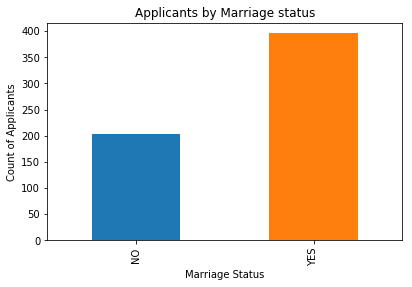

In [23]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Marriage Status')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Marriage status")
temp1.plot(kind='bar')

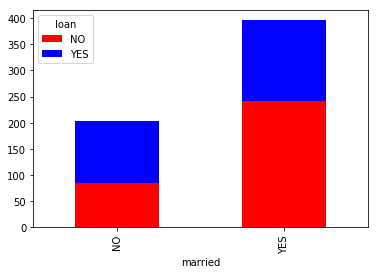

In [24]:
#temp3 = pd.crosstab(df['married'], df['loan'])
temp3 = ds_orig.groupby(['married','loan'])['married'].count().unstack('loan')
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [25]:
# Feature extraction
# For each X, calculate VIF and save in dataframe
vif = pandas.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [26]:
print(vif.round(1))

    VIF Factor     features
0         24.7    Intercept
1          1.0           id
2          2.4          age
3          1.0          sex
4          1.0       region
5          2.4       income
6          1.0      married
7          1.0     children
8          1.0          car
9          1.1   saving_acc
10         1.0  current_acc
11         1.0     mortgage


In [27]:
def calculate_vif_(A, thresh=10.0):
    features = []
    for index, row in A.iterrows():
        if(row[0] <= thresh):
            features.append(row[1])

    print('Remaining variables:')
    print(features)
    return features

In [28]:
vif.apply(lambda x: print(x[0]))

24.74560103474753
Intercept


VIF Factor    None
features      None
dtype: object

In [29]:
feature_list = calculate_vif_(vif)
print(feature_list)
print(len(feature_list))

Remaining variables:
['id', 'age', 'sex', 'region', 'income', 'married', 'children', 'car', 'saving_acc', 'current_acc', 'mortgage']
['id', 'age', 'sex', 'region', 'income', 'married', 'children', 'car', 'saving_acc', 'current_acc', 'mortgage']
11


In [30]:
# removing id; useless feature
feature_list.remove('id')
feature_list.remove('current_acc')
feature_list.remove('car')
print(feature_list)

['age', 'sex', 'region', 'income', 'married', 'children', 'saving_acc', 'mortgage']


In [31]:
new_df = dataset[feature_list]
print(new_df.head())

   age  sex  region   income  married  children  saving_acc  mortgage
0   40    1       3  30085.1        1         3           0         1
1   51    0       0  16575.4        1         0           1         0
2   23    0       3  20375.4        1         3           0         0
3   57    0       1  50576.3        1         0           1         0
4   57    0       3  37869.6        1         2           1         0


In [32]:
# class distribution
print(ds_orig.groupby('loan').size())
%matplotlib inline

loan
NO     326
YES    273
dtype: int64


In [33]:
new_df.shape

(599, 8)

In [34]:
from sklearn import model_selection
seed = 5
scoring = 'accuracy'
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(new_df, Y, test_size=.3,random_state=seed)

In [35]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.639663 (0.059406)
LDA: 0.632520 (0.056116)
KNN: 0.589547 (0.048093)
CART: 0.830488 (0.055983)
NB: 0.661150 (0.064299)
SVM: 0.536760 (0.087392)


In [36]:
# Make predictions on validation dataset
from sklearn import tree
knn = tree.DecisionTreeClassifier()
knn = knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8166666666666667
[[85 15]
 [18 62]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.81      0.78      0.79        80

   micro avg       0.82      0.82      0.82       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180



In [37]:
from sklearn.externals.six import StringIO  
import pydot

import os
os.environ["PATH"] += os.pathsep + 'C:/Anaconda3/pkgs/graphviz-2.38.0-4/Library/bin/graphviz'

dot_data = StringIO() 
tree.export_graphviz(knn, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

graph[0].write_pdf("DecisionTree-loan.pdf")